In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
store = pd.HDFStore("london_dua60.h5")

In [3]:
tripdf = store["tripinfos_df"]

In [4]:
tripdf[:5]

,tripinfo_arrival,tripinfo_waitSteps,tripinfo_vType,tripinfo_depart,tripinfo_routeLength,tripinfo_vaporized,tripinfo_duration,tripinfo_arrivalSpeed,tripinfo_devices,tripinfo_departPos,tripinfo_departDelay,tripinfo_timeLoss,tripinfo_departLane,tripinfo_departSpeed,tripinfo_arrivalPos,tripinfo_rerouteNo,tripinfo_id,tripinfo_arrivalLane
0,131.0,13,DEFAULT_VEHTYPE,12.0,1121.43,NaN,119.0,12.73,tripinfo_7863,5.1,-0.76,34.07,220019919#0_1,11.26,230.76,0,7863,-387883965#4_0
1,221.0,25,DEFAULT_VEHTYPE,59.0,1121.43,NaN,162.0,12.21,tripinfo_7874,5.1,21.53,77.33,220019919#0_1,1.07,230.76,0,7874,-387883965#4_0
2,280.0,57,DEFAULT_VEHTYPE,75.0,1121.43,NaN,205.0,10.51,tripinfo_7902,5.1,33.86,119.94,220019919#0_1,5.57,230.76,0,7902,-387883965#4_0
3,307.0,3,DEFAULT_VEHTYPE,5.0,3255.66,NaN,302.0,12.33,tripinfo_24180,5.1,-0.37,36.99,8599345#0_0,8.94,50.57,0,24180,220019919#0_1
4,314.0,94,DEFAULT_VEHTYPE,8.0,2286.24,NaN,306.0,12.22,tripinfo_6550,5.1,-0.42,133.61,211486426#0_0,13.41,21.28,0,6550,51958479#0_0


In [5]:
tripdf.ix[:5,"tripinfo_duration"]

0    119.0
1    162.0
2    205.0
3    302.0
4    306.0
5    244.0
Name: tripinfo_duration, dtype: float64

In [6]:
tripdf["tripinfo_duration"].hist(normed=True)

In [7]:
#plt.savefig("trip_duration_hist.jpg")

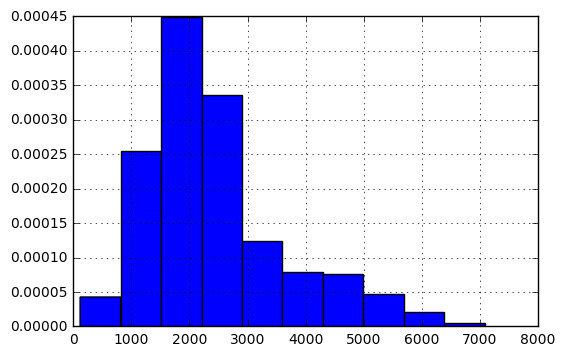

In [8]:
plt.show()

In [9]:
tripdf["tripinfo_arrival"].hist(bins=[0,1800,3600,5400,7200])

In [ ]:
#plt.savefig("completed_trips_hist_4bins_half_hour.jpg")

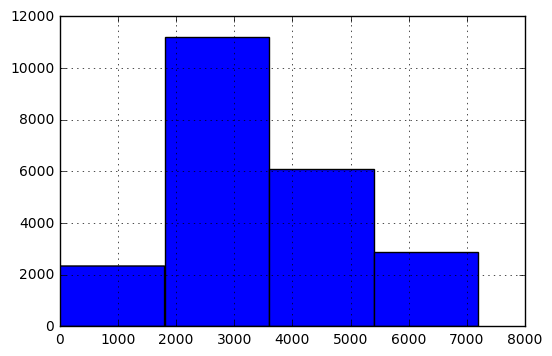

In [10]:
plt.show()

In [11]:
import scipy.stats as st

In [ ]:
#data = np.log(tripdf["tripinfo_duration"])

In [ ]:
#data.hist()

In [ ]:
#plt.show()

In [12]:
s,loc,scale = st.lognorm.fit(tripdf["tripinfo_duration"])
print s,loc,scale

7.16425286558 119.0 3.34270964998


In [ ]:
#loc2,scale2 = st.norm.fit(data)
#print loc2,scale2

In [84]:
x= np.linspace(0,8000,8000)

In [85]:
print x

[  0.00000000e+00   1.00012502e+00   2.00025003e+00 ...,   7.99799975e+03
   7.99899987e+03   8.00000000e+03]


In [119]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(tripdf["tripinfo_duration"],normed=True,alpha=0.3)
ln = (st.lognorm.pdf(x,s=0.5,loc=loc,scale=np.exp(7.7)))
print len(ln)
print len(x)
#print [round(x,3) for x in ln[:10]]
ax.plot(ln,color="r")

8000
8000


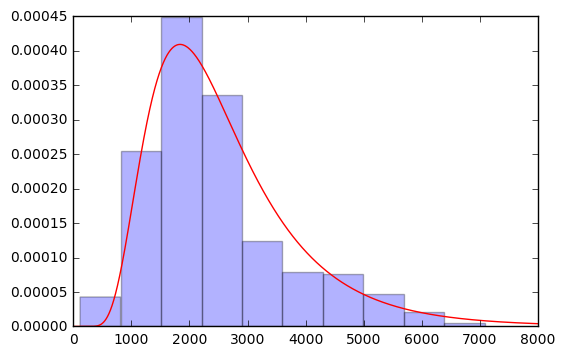

In [120]:
plt.show()

In [21]:
plt.close("all")